In [7]:
%matplotlib inline
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
products = pd.read_csv('new_result.csv', sep=',')
reviews = pd.read_csv("reviews.csv")

In [5]:
products.head()

,product_id,product_name,product_brand,product_detail,product_description,product_price,product_sale,weight,photo_num,best_seller_rank,water_proof,noise_cancel,micro_phone,review_num,review_rate
0,B012N7X65S,Trendwoo Runner X9 Bluetooth 4.0 Wireless Ster...,Trendwoo,Enter your model number above to make sure thi...,Features: Specifications: Model: Runner X9 Blu...,39.99,0.00,82.213617,7,2318,1,0,0,228,3.7
1,B016OADE1Q,"Bluetooth 4.1 Headphones,LADEY Wireless Blueto...",LADEY,"Bluetooth 4.1,support volume control,it also c...","Sweatproof design,best choice when you do spor...",44.29,14.26,861.825503,7,9289,1,1,0,0,0.0
2,B005IYDFVO,Clarity CE50 HearIt Mobile Bluetooth Neckloop,Clarity,Clarity CE50 Purchase Includes:CE50 hand-free ...,"Wireless, hands-free communication for Bluetoo...",0.00,0.00,340.194277,1,10653,0,0,1,6,3.0
3,B017RDCZ1Y,PowerLead S200 Bluetooth 4.1 Sport Gym Running...,PowerLead,Premuim high quality CSR chip allows this head...,Product fetures: It's a high end smart sports ...,56.87,40.54,8.504857,7,8379,0,1,0,11,4.5
4,B01AHYVC8M,Car MP3 Player Transmissor FM sem fio Dual USB...,Love Lover,"Can charge mobile phones, never worry about po...",Product description: - Can charge mobile phone...,0.00,0.00,NaN,5,8473,0,1,1,0,0.0


In [6]:
reviews.head()

,id,pid,author,rate,title,content,date,verified,color,vote
0,R2FVGLARZJG07Z,B012N7X65S,Amazon Customer,1,Would not buy again,These worked great for about 2 days. Then they...,2016-4-17,1,Blue,0
1,R3REA8NAIKAM81,B012N7X65S,Kevin S,1,Overheated While Charging,"A couple months after using only a few times, ...",2016-4-10,1,Blue,1
2,R3GEDQ48VESB50,B012N7X65S,romancereader243,5,Five Stars,Very easy to handle,2016-4-10,1,Blue,0
3,R2ZL7XB9BDB5SP,B012N7X65S,Harry Schwartz,3,good for price,For the price they are alright. They have a pi...,2016-4-9,1,Blue,0
4,R1PXUFQXRVS5EB,B012N7X65S,MajorTom007,1,Never buy Trendwoo. Never Buy from TopBrandBo...,"After light use only 3-4 hours a week, the hea...",2016-3-31,1,Red,0


#Summary

In [48]:
# # plt.figure(figsize=(12, 12))
fig_size = plt.rcParams["figure.figsize"]
print "Current size:", fig_size
# fig_size[0] = 12
# fig_size[1] = 9
# plt.rcParams["figure.figsize"] = fig_size
# plt.figure(figsize=(12,9), dpi=300)
# import matplotlib as mpl
# mpl.rcParams['font.size']=12
# mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.figsize']=(8.0,6.0)

Current size: [12.0, 9.0]


#### 由於有些商品沒有特價只有原價，或有些商品沒有原價只有特價，就會分別遺失 product_sale 和 product_price 的 feature，因此我們要把遺失的資料補齊。

In [67]:
def cleanPrice(row):
    if row["product_price"] * row["product_sale"] == 0:
        row["product_price"], row["product_sale"] = max(row["product_price"],row["product_sale"]), max(row["product_price"],row["product_sale"])
    return row
products = products.apply(cleanPrice, axis=1)

重新檢查資料，剛剛 product_price 或是 product_sale 只有其中一個 feature 為 0 的商品應該都已經不是 0 了。如果有這種情況的商品我們就把他去掉。

In [71]:
products = products[products["product_price"] > 0]

於是我們便成功得到了以下參數的總數、平均值、標準差、最大最小值與中位數。
* 商品原價 (product_price) 
* 商品售價 (product_sale) 
* 評價數量 (review_num) 
* 評價分數 (review_rate) 

In [73]:
products[["product_price","product_sale","review_num","review_rate"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
product_price,9381,52.506090,48.401865,0.25,19.99,39.99,69.99,699.99
product_sale,9381,39.826375,45.287716,0.25,15.99,24.99,49.56,699.99
review_num,9381,55.727428,120.648443,0.00,1.00,10.00,47.00,975.00
review_rate,9381,3.084415,1.651814,0.00,2.70,3.60,4.20,5.00


####價錢：
我們可以從以上的結果得知藍牙耳機的總數有 9381 隻，商品原價平均為 $52.5，商品實售價平均為 $39.8，折扣佔了原價的 24%。商品售價低於 $50 的藍芽耳機佔了總數的 80% 左右，意即藍芽耳機是一個低價競爭的市場。
####評論：
每個商品平均會有55個評論，平均分數為 3.08分，和 1-5 分的中位數 3 是差不多的。而中位數落在3.6則代表這是一個左偏的圖形。

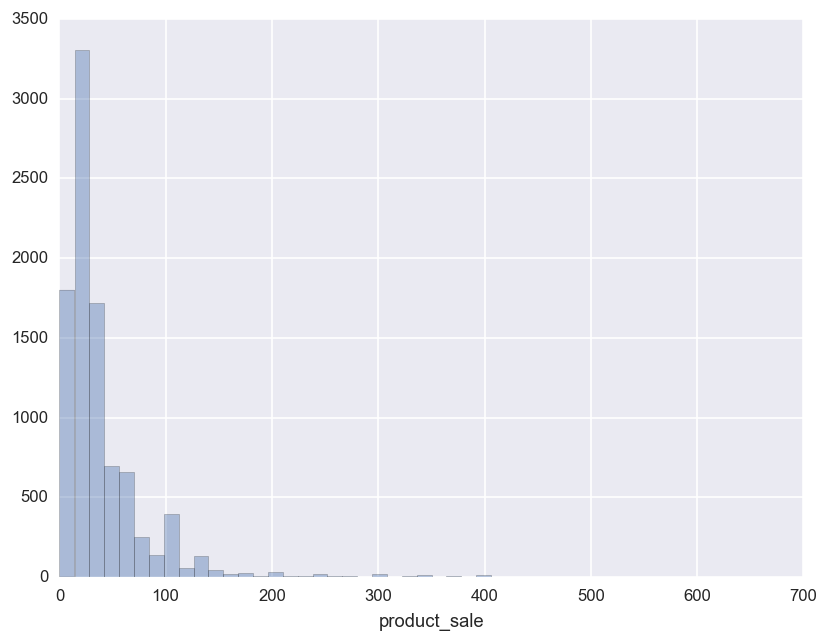

In [74]:
sns.distplot(products.product_sale, kde=False)

In [72]:
len(products)

9381

In [75]:
len(products[products["product_sale"] < 50])

7429

In [11]:
my_data['product_discount'] = my_data['product_price'] - my_data['product_sale']
my_data = my_data[my_data["product_price"] > 0]

,count,mean,std,min,25%,50%,75%,max
product_price,9381,52.506090,48.401865,0.250000,19.990000,39.990000,69.990000,699.990000
product_sale,9381,39.826375,45.287716,0.250000,15.990000,24.990000,49.560000,699.990000
weight,7080,120.710908,278.666953,5.669905,17.009714,68.038855,136.077711,9661.517481
photo_num,9381,5.305191,2.045465,-1.000000,4.000000,6.000000,7.000000,9.000000
best_seller_rank,9381,5659.139324,4099.411609,0.000000,2100.000000,5042.000000,8847.000000,39193.000000
water_proof,9381,0.092527,0.289785,0.000000,0.000000,0.000000,0.000000,1.000000
noise_cancel,9381,0.271506,0.444760,0.000000,0.000000,0.000000,1.000000,1.000000
micro_phone,9381,0.367765,0.482223,0.000000,0.000000,0.000000,1.000000,1.000000
review_num,9381,55.727428,120.648443,0.000000,1.000000,10.000000,47.000000,975.000000
review_rate,9381,3.084415,1.651814,0.000000,2.700000,3.600000,4.200000,5.000000


In [13]:
#分析價格、重量（要再處理outlier）、防水功能9.2%、noise cancel 27%、mic 36%
my_data.to_csv('pd_result.csv')

#Text

In [241]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()

In [242]:
name_np = my_data["product_name"].values
name_bag = count.fit_transform(name_np)

In [245]:
print(count.vocabulary_)
sorted_x = sorted(count.vocabulary_.items(), key=operator.itemgetter(1))

{u'versatile': 6561, u'dynamic': 2308, u'yellow': 6935, u'four': 2798, u'ek360': 2443, u'6pc': 544, u'hanging': 3165, u'ansion': 1012, u'captain': 1711, u'optical': 4761, u'toosell': 6319, u'xts': 6916, u'bg920bbebus': 1319, u'swan': 6142, u'neckland': 4609, u'kingstar': 3844, u'be011': 1265, u'fz72': 2852, u'up2': 6475, u'hats': 3178, u'up1': 6474, u'swivel': 6156, u'lumix': 4120, u'7975g': 612, u'deli': 2141, u'activation': 863, u'jesiyatm': 3725, u'dell': 2145, u'p253': 4817, u'55mm': 449, u'hdtv': 3226, u'qsoon': 5176, u'sleek': 5780, u'handfree': 3154, u'voip': 6628, u'blueaction': 1408, u'clovers': 1847, u'nfl': 4642, u'wooden': 6814, u'sjyn0234': 5754, u'xpressway': 6900, u'solution': 5870, u'convenience': 1940, u'enhance': 2494, u'gadgetbrat': 2888, u'h004b': 3047, u'force': 2790, u'noisehush': 4667, u'limiter': 4031, u'soundbuds': 5893, u'japanese': 3707, u'pulse': 5130, u'millet': 4372, u'270': 239, u'elegant': 2452, u'second': 5592, u't500': 6177, u'277': 241, u'aux': 1155, 

NameError: name 'operator' is not defined

In [251]:
# t=re.split('\W+',sys.stdin.read().lower())
r=sorted(count.vocabulary_ for w in set(t)if w not in'andithetoforinis')[:22]

NameError: name 'sys' is not defined

In [261]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Feelings/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [262]:
t=re.split('\W+',name_np.dumps())
r=sorted((-t.count(w),w)for w in set(t)if w not in stop)
fr = r[:50]
for l,w in fr:print(78-len(fr[0][1]))*l/fr[0][0]*'=',w

===================================================================== Bluetooth
========================================== Wireless
======================================= U
==================================== Headset
========================== Stereo
======================= Headphones
==================== r
==================== 4
================= Samsung
================ iPhone
============== Headphone
============= Earbuds
============= Black
============ 6
============ Sports
============ 0
============ Microphone
=========== Earphone
========== Galaxy
========== 1
========= Ear
========= Android
========= Sport
========= Mic
========= Noise
========= Hands
======== 3
======== Earphones
======== Music
======= 2
======= Running
======= Mini
======= LG
====== 5
====== iPad
====== In
====== j
====== Headsets
===== free
===== Smart
===== Phones
===== Universal
===== For
===== Sweatproof
===== Free
===== Note
===== Cancelling
===== Plus
===== HTC
===== Gym


In [265]:
#有bluetooth, wireless是一定的, headset->earbuds種類, 手機品牌(samsung, iphone最多), mic, sports, ruuning很有趣

In [ ]:
#description & detail text analysis

In [267]:
#brand analysis: review數量最多的 通常review number可以反映購買數量，把number*rate評比戰力?也可以適用於產品比較

#SIMILAR PORDUCT: KNN MODEL

In [268]:
from sklearn.neighbors import NearestNeighbors

In [276]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors([4,4])
indices

array([[5, 4]])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
np.set_printoptions(precision=2)
print(tfidf.fit_transform(count.fit_transform(name_np)).toarray())

In [286]:
my_data

,product_id,product_name,product_brand,product_detail,product_description,product_price,product_sale,weight,photo_num,best_seller_rank,water_proof,noise_cancel,micro_phone,review_num,review_rate,product_discount
0,B012N7X65S,Trendwoo Runner X9 Bluetooth 4.0 Wireless Ster...,Trendwoo,Enter your model number above to make sure thi...,Features: Specifications: Model: Runner X9 Blu...,39.99,0.00,82.213617,7,2318,1,0,0,228,3.7,39.99
1,B016OADE1Q,"Bluetooth 4.1 Headphones,LADEY Wireless Blueto...",LADEY,"Bluetooth 4.1,support volume control,it also c...","Sweatproof design,best choice when you do spor...",44.29,14.26,861.825503,7,9289,1,1,0,0,0.0,30.03
3,B017RDCZ1Y,PowerLead S200 Bluetooth 4.1 Sport Gym Running...,PowerLead,Premuim high quality CSR chip allows this head...,Product fetures: It's a high end smart sports ...,56.87,40.54,8.504857,7,8379,0,1,0,11,4.5,16.33
6,B00IJG54RQ,SHOWERDOORDIRECT.COM WWBS-BU Waterproof Blueto...,SHOWER DOOR DIRECT,Enter your model number above to make sure thi...,Now you can sing in your shower and enjoy all ...,69.99,0.00,221.126280,2,3779,0,0,0,0,0.0,69.99
7,B00XQSQKI4,"BluBeats Bluetooth Headset, High-Quality, Cris...",Klip xtreme,Mobile headset with Bluetooth wireless technol...,Klip Xtreme BluBeats mobile headset with Bluet...,34.99,0.00,9661.517481,4,5994,0,0,1,4,3.0,34.99
8,B01AD9XU04,"OEM [2016 Version] Sport Handsfree, Stereo V8 ...",BlueRay®,Brand New and High Quality Suitable For BLU St...,Compatible with any bluetooth enabled mobile p...,39.99,24.99,45.359237,7,11819,0,0,0,0,0.0,15.00
9,B00XLQWHI8,BSI 3pcs Metal Clasps for Fitbit Charge Band W...,PL,BSI 3pcs Metal Clasps for Fitbit Charge Band W...,BSI 3pcs Metal Clasps for Fitbit Charge Band W...,6.02,0.00,NaN,2,11609,0,0,0,0,0.0,6.02
10,B00Y4M01JA,"Bluetooth Headphones, TOTU Wireless Bluetooth ...",TOTU,Advanced Technology: With bluetooth 4.0 and ap...,About TOTU: TOTU use the best material and bra...,139.99,19.99,14.174762,7,21,1,0,1,905,3.3,120.00
11,B011Y3GU0U,Bluetooth Wireless HandFree Sports Stereo Head...,Doormoon,100% brand new!! Compatible with Advanced Blue...,Designed with precision and feature the highes...,20.80,12.00,NaN,7,13412,0,0,0,0,0.0,8.80
12,B00NG57HF2,Sony MDR-XB950BT/H Extra Bass Bluetooth Headse...,Sony,"This product has a Bluetooth.By Bluetooth,you ...",Headphone parts Model: closed dynamic. Driver ...,169.40,0.00,680.388555,1,1290,0,0,0,21,4.9,169.40


In [14]:
#graphlab
import graphlab
gf = graphlab.SFrame('pd_result.csv')

A newer version of GraphLab Create (v1.8.5) is available! Your current version is v1.8.4.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.
2016-04-15 16:42:14,112 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.8.4 started. Logging: /tmp/graphlab_server_1460709732.log


Finished parsing file /Users/Feelings/Programming/amazon-review/crawler/pd_result.csv

Parsing completed. Parsed 100 lines in 0.221503 secs.

This non-commercial license of GraphLab Create is assigned to b99705016@ntu.edu.tw and will expire on March 02, 2017. For commercial licensing options, visit https://dato.com/buy/.
------------------------------------------------------

Finished parsing file /Users/Feelings/Programming/amazon-review/crawler/pd_result.csv

Parsing completed. Parsed 9381 lines in 0.386209 secs.


Inferred types from first line of file as 
column_type_hints=[int,str,str,str,str,str,float,float,float,int,int,int,int,int,int,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


In [15]:
gf['detail_tfidf'] = graphlab.text_analytics.tf_idf(gf['product_detail'])
gf['description_tfidf'] = graphlab.text_analytics.tf_idf(gf['product_description'])

In [17]:
knn_model = graphlab.nearest_neighbors.create(gf, features=['detail_tfidf','description_tfidf'], label='product_id')

Starting brute force nearest neighbors model training.

Defaulting to brute force instead of ball tree because there are multiple distance components.


In [18]:
knn_model.query(gf[gf['product_id']=='B012N7X65S'])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0106598   | 16.482ms     |

| Done         |         | 100         | 70.992ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,B012N7X65S,0.0,1
0,B012N7WVW2,0.0,2
0,B015W1SY1I,1.23811107416,3
0,B015W1SWRE,1.23811107416,4
0,B015W1SVH0,1.23811107416,5


In [21]:
knn_mixed_model = graphlab.nearest_neighbors.create(gf, features=['detail_tfidf','description_tfidf','water_proof','noise_cancel','micro_phone'], label='product_id')

Starting brute force nearest neighbors model training.

Defaulting to brute force instead of ball tree because there are multiple distance components.


In [20]:
knn_mixed_model.query(gf[gf['product_id']=='B012N7X65S'])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0106598   | 23.708ms     |

| Done         |         | 100         | 84.273ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,B012N7X65S,0.0,1
0,B012N7WVW2,0.0,2
0,B015W1SY1I,1.23811107416,3
0,B015W1SWRE,1.23811107416,4
0,B015W1SVH0,1.23811107416,5


In [26]:
#add price feature

In [25]:
#normalization
gf["normalized_sale"] = gf["product_sale"] - gf["product_sale"].min() / gf["product_sale"].max() - gf["product_sale"].min()

In [23]:
knn_mixed_model = graphlab.nearest_neighbors.create(gf, features=['detail_tfidf','description_tfidf','water_proof','noise_cancel','micro_phone','normalized_sale'], label='product_id')

Starting brute force nearest neighbors model training.

Defaulting to brute force instead of ball tree because there are multiple distance components.


In [24]:
knn_mixed_model.query(gf[gf['product_id']=='B012N7X65S'])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0106598   | 25.151ms     |

| Done         |         | 100         | 97.112ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,B012N7X65S,0.0,1
0,B012N7WVW2,0.0,2
0,B00VLMUSPS,1.72049637479,3
0,B015E1OUOQ,1.77570876684,4
0,B015E1OLH2,1.77570876684,5


In [82]:
tb = {}
tb["brand"] = my_data["product_brand"]
tb["price"] = my_data["product_price"]
tb["sale"] = my_data["product_sale"]
tb["review_number"] = my_data["review_num"]
tb["review_rate"] = my_data["review_rate"]

In [102]:
def replaceSale(row):
    if row["sale"] == 0.0:
        row["sale"] = row["price"]
    return row

In [ ]:
tb = pd.DataFrame(tb)
tb = tb.apply(replaceSale, axis=1)

In [86]:
tb["discount"] = tb["price"] - tb["sale"]
tb_csv = pd.DataFrame(tb).to_csv("tb.csv")

In [67]:
#for review parsing

In [30]:
len(my_data["review_num"])

9381

In [64]:
import math
my_data = pd.read_csv('new_result.csv', sep=',')
review_page = pd.DataFrame()
review_page["id"] = my_data["product_id"]
review_page["page"] = my_data["review_num"].apply(lambda x: int(math.ceil(float(x)/50)))

In [65]:
review_page.drop_duplicates(subset="id")

,id,page
0,B012N7X65S,5
1,B016OADE1Q,0
2,B005IYDFVO,1
3,B017RDCZ1Y,1
4,B01AHYVC8M,0
5,B0012YZQ9I,1
6,B00IJG54RQ,0
7,B00XQSQKI4,1
8,B01AD9XU04,0
9,B00XLQWHI8,0


In [66]:
review_page.to_csv(path_or_buf ="ipd_with_page.csv", index_label=False, index =False, header =False)